<a href="https://colab.research.google.com/github/bryanMontoya/machineLearning/blob/main/Regresi%C3%B3nLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
diabetes_X, diabetes_y = load_diabetes(return_X_y = True)
print(diabetes_X.shape)

(442, 10)


In [ ]:
diabetes_X = diabetes_X[:,np.newaxis, 2]
print(diabetes_X.shape)

(442, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size = 0.2, random_state = 4)
print(X_train.shape)

(353, 1)


In [ ]:
regr = LinearRegression()
regr.fit(X_train, y_train);

In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
print('Pendiente: \n', regr.coef_)
print('Intercepto: \n', regr.intercept_)

Pendiente: 
 [923.51473399]
Intercepto: 
 151.18774341365938


In [ ]:
print('Error cuadrático medio: %.2f' % mean_squared_error(y_test, y_pred) )

Error cuadrático medio: 3184.92


Una métrica para determinar que tanto se ajusta el modelo a los datos de test, se conoce como coeficiente de determinacion $R^2$, que se define como , $$R^2 = \frac{\sigma^2_{XY}}{\sigma^2_{X} \sigma^2_{Y}}$$
Donde:
- $\sigma^2_{XY}$ es la covarianza entre X y Y.
- 

In [ ]:
print('Coeficiente de determiación: %.2f' %r2_score(y_test, y_pred))

Coeficiente de determiación: 0.42


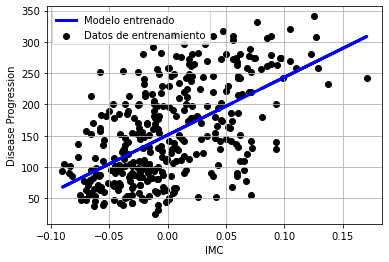

In [ ]:
y_pred1 = regr.predict(X_train);
plt.scatter(X_train, y_train, color = 'k', label = 'Datos de entrenamiento');
plt.plot(X_train, y_pred1, color = 'b', lw = 3, label = 'Modelo entrenado');
plt.grid();
plt.legend();
plt.xlabel('IMC');
plt.ylabel('Disease Progression');

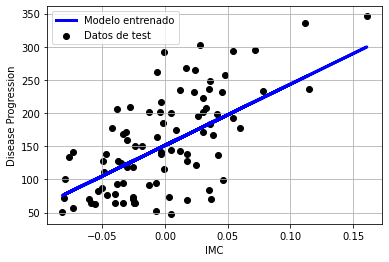

In [ ]:
plt.scatter(X_test, y_test, color = 'k', label = 'Datos de test');
plt.plot(X_test, y_pred, color = 'b', lw = 3, label = 'Modelo entrenado');
plt.grid();
plt.legend();
plt.xlabel('IMC');
plt.ylabel('Disease Progression');

**Regresión no Lineal.**

In [ ]:
diabetes_X, diabetes_y = load_diabetes(return_X_y = True)
diabetes_X = diabetes_X[:, np.newaxis, 2]
X = np.concatenate((diabetes_X, diabetes_X**2, diabetes_X**3, np.exp(diabetes_X)), axis = 1)
print(X.shape)

(442, 4)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, diabetes_y, test_size = 0.2, random_state = 4)
print(X_train.shape)

(353, 4)


In [ ]:
regr.fit(X_train, y_train);
y_pred = regr.predict(X_test);

In [ ]:
print('Coeficientes: \n', regr.coef_)
print('Intercepto: \n', regr.intercept_)

Coeficientes: 
 [-1562670.96023608  -781052.25752847  -285706.02927375  1563706.55573898]
Intercepto: 
 -1563556.621923917


In [ ]:
print('Error cuadrático medio: %.2f' % mean_squared_error(y_test, y_pred))
print('Coeficiente de determinación: %.2f' % r2_score(y_test, y_pred))

Error cuadrático medio: 3202.98
Coeficiente de determinación: 0.41


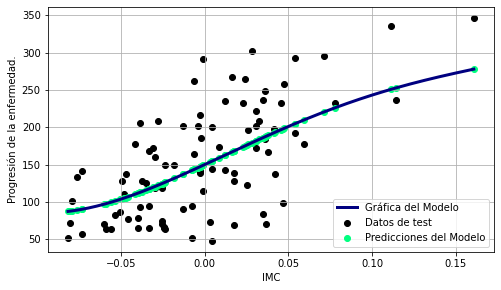

In [ ]:
plt.figure(figsize = (8, 4.5));
plt.scatter(X_test[:,0], y_test, color = 'k', label = 'Datos de test');
x = np.linspace(np.min(X_test[:,0]), np.max([X_test[:,0]]),200);
y_pred1 = regr.intercept_ + regr.coef_[0]*x + regr.coef_[1]*x**2 + regr.coef_[2]*x**3 + regr.coef_[3]*np.exp(x)
plt.plot(x,y_pred1, color = [0,0,0.5], lw = 3, label = 'Gráfica del Modelo');
plt.scatter(X_test[:,0], y_pred, color = [0,1,0.5], label = 'Predicciones del Modelo');
plt.grid();
plt.legend();
plt.xlabel('IMC');
plt.ylabel('Progresión de la enfermedad.');

Parte 3.

In [ ]:
diabetes_X, diabetes_y = load_diabetes(return_X_y = True)
print(diabetes_X.shape)

(442, 10)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size = 0.2, random_state = 4)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
regr.fit(X_train, y_train);
y_pred = regr.predict(X_test);

In [ ]:
print('Coeficientes: \n', regr.coef_)
print('Intercepto: \n', regr.intercept_)

Coeficientes: 
 [  1.57877308 -13.87492156  23.1625913   17.73916692 -45.27597611
  27.5074988   11.03361289  13.59655962  39.31814162   1.76796595]
Intercepto: 
 151.6317280453258


In [ ]:
print('Error cuadrático medio: %.2f' % mean_squared_error(y_test, y_pred))
print('Coeficiente de determinaciin: %.2f' % r2_score(y_test, y_pred))

Error cuadrático medio: 2939.42
Coeficiente de determinaciin: 0.46


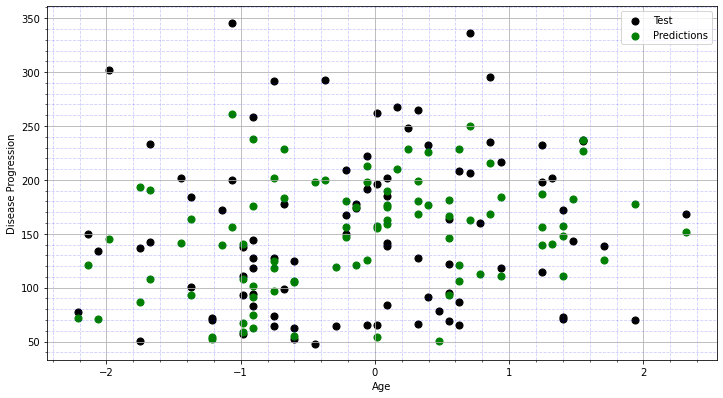

In [ ]:
plt.figure(figsize = (12,6.5));
plt.scatter(X_test[:,0],y_test, color = 'k', label = 'Test', s = 50);
plt.scatter(X_test[:,0],y_pred, color = 'g', label = 'Predictions', s = 50);
plt.legend();
plt.grid();
plt.minorticks_on();
plt.grid(which = 'minor', color = 'b', ls = '--', alpha = 0.2);
plt.xlabel('Age');
plt.ylabel('Disease Progression')
plt.savefig('graficaRL.pdf', transparent = True)